In [2]:
import pandas as pd
pd.set_option('display.max_rows', 15)  # or use a specific number
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import math
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

**EDA** PREDICTING PULMONARY EDEMA

In [150]:
from ucimlrepo import fetch_ucirepo 
pd.set_option('display.max_rows', None)
  
# fetch dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579) 
  
# data (as pandas dataframes) 
df = myocardial_infarction_complications.data.original 
X_full = myocardial_infarction_complications.data.features[:] 
y_full = myocardial_infarction_complications.data.targets[:] 

X = X_full[:]
y = y_full[:]
  
# metadata 
#print(myocardial_infarction_complications.metadata) 
  
# variable information 
vars = myocardial_infarction_complications.variables


{'uci_id': 579, 'name': 'Myocardial infarction complications', 'repository_url': 'https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications', 'data_url': 'https://archive.ics.uci.edu/static/public/579/data.csv', 'abstract': 'Prediction of myocardial infarction complications', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1700, 'num_features': 111, 'feature_types': ['Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C53P5M', 'creators': ['S.E. Golovenkin', 'V.A. Shulman', 'D.A. Rossiev', 'P.A. Shesternya', 'S.Yu. Nikulina', 'Yu.V. Orlova', 'V.F. Voino-Yasenetsky'], 'intro_paper': {'ID'

In [152]:
print(vars[vars['role']=='Target'])

           name    role         type demographic  \
112  FIBR_PREDS  Target       Binary        None   
113   PREDS_TAH  Target       Binary        None   
114   JELUD_TAH  Target       Binary        None   
115  FIBR_JELUD  Target       Binary        None   
116    A_V_BLOK  Target       Binary        None   
117   OTEK_LANC  Target       Binary        None   
118      RAZRIV  Target       Binary        None   
119    DRESSLER  Target       Binary        None   
120         ZSN  Target       Binary        None   
121      REC_IM  Target       Binary        None   
122   P_IM_STEN  Target       Binary        None   
123      LET_IS  Target  Categorical        None   

                                           description units missing_values  
112                                Atrial fibrillation  None             no  
113                       Supraventricular tachycardia  None             no  
114                            Ventricular tachycardia  None             no  
115        

In [149]:
##FIND NUMBER OF EACH TARGET VARIABLE
#note, from metadata we know that there are no missing values in the target variables
print('y==1')
print((y == 1).sum())
# print('--')
# print('y==0')
# print((y == 0).sum())

#(y == 1).sum()/((y == 0).sum()+(y==1).sum())

y==1
FIBR_PREDS    170
PREDS_TAH      20
JELUD_TAH      42
FIBR_JELUD     71
A_V_BLOK       57
OTEK_LANC     159
RAZRIV         54
DRESSLER       75
ZSN           394
REC_IM        159
P_IM_STEN     148
LET_IS        110
dtype: int64


In [148]:
##FIND NUMBER OF NANS IN FEATURES
X_nan_number = X.isna().sum().sort_values(ascending=False)
X_nan_percentage = X_nan_number/1700

#print(X_nan_percentage)

In [6]:
names_binary_feats = np.array(vars[(vars['type']=='Binary') & (vars['role']=='Feature')].name)
names_cat_feats = np.array(vars[(vars['type']=='Categorical') & (vars['role']=='Feature')].name)
names_int_feats = np.array(vars[(vars['type']=='Integer') & (vars['role']=='Feature')].name)
names_cont_feats = np.array(vars[(vars['type']=='Continuous') & (vars['role']=='Feature')].name)


In [7]:
pd.set_option('display.max_rows', None)  # or use a specific number
pd.set_option('display.max_columns', None)

feature_names = vars[(vars['type'] == 'Binary') & (vars['role'] == 'Feature')]['name'].tolist()
print(feature_names)

# feature_data = vars[vars['role'] == 'Feature'][['description', 'name', 'type']]
# feature_data.to_csv('feature_names.csv', index=True)
# col_headers = vars[vars['role']=='Feature'].description
# list_headers = [x for x in col_headers]
# print(list_headers)

# col_headers = vars[vars['role']=='Target'].description
# list_headers = [x for x in col_headers]
# print(list_headers)

#print(vars[['name','description','type']])

pd.set_option('display.max_rows', 15)  # or use a specific number



['SEX', 'IBS_NASL', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'GIPER_NA', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', '

In [167]:
pd.set_option('display.max_colwidth', None)
target_names = np.array(vars.loc[vars['role']=='Target'].name)
#vars.loc[vars['name']=='OTEK_LANC']
#y.value_counts()
y['OTEK_LANC'].value_counts()

OTEK_LANC
0    1541
1     159
Name: count, dtype: int64

<Axes: xlabel='REC_IM', ylabel='K_BLOOD'>

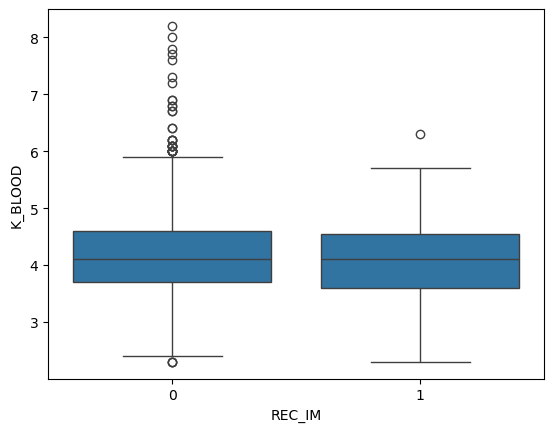

In [9]:
sns.boxplot(x='REC_IM', y='K_BLOOD', data=df)


**SPLITTING DATA**



In [10]:
random_state = 42

def basic_split(X,y,train_size,val_size,test_size,random_state):
    #tests inputs
    if train_size+val_size+test_size==1:
        print("the sizes sum to 1")
    else:
        print("error: the sizes sum to", train_size+val_size+test_size)
    
    if isinstance(random_state, int):
        print("random state is an integer")
    else:
        print("error: random state is not an integer")

    
    # first split to separate out the training set
    X_train, X_other, y_train, y_other = train_test_split(X,y, train_size=train_size,random_state = random_state)
    
    TestSize = test_size/(test_size+val_size)
    # second split to separate out the validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,test_size=TestSize,random_state = random_state)

    #tests outputs
    X_size = X.shape[0]
    y_size = y.shape[0]
    tolerance=0.01

    if math.isclose(X_train.shape[0]/X_size,train_size,rel_tol=tolerance):
        print("X_train is the correct size!")
    else:
        print("error: X_train is of size", X_train.shape[0]/X_size)
    
    if math.isclose(X_val.shape[0]/X_size,val_size,rel_tol=tolerance):
        print("X_train is the correct size!")
    else:
        print("error: X_val is of size", X_val.shape[0]/X_size)

    if math.isclose(X_test.shape[0]/X_size,test_size,rel_tol=tolerance):
        print("X_train is the correct size!")
    else:
        print("error: X_test is of size", X_test.shape[0]/X_size)
    
    if math.isclose(y_train.shape[0]/y_size,train_size,rel_tol=tolerance):
        print("y_train is the correct size!")
    else:
        print("error: y_train is of size", y_train.shape[0]/y_size)
    
    if math.isclose(y_val.shape[0]/y_size, val_size,rel_tol=tolerance):
        print("y_train is the correct size!")
    else:
        print("error: y_val is of size", y_val.shape[0]/y_size)

    if math.isclose(y_test.shape[0]/y_size,test_size,rel_tol=tolerance):
        print("y_train is the correct size!")
    else:
        print("error: y_test is of size", y_test.shape[0]/y_size)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [75]:
onehot_ftrs = np.concatenate((names_binary_feats, ['ant_im', 'lat_im', 'inf_im', 'post_im']))
ordinal_ftrs = np.concatenate((np.setdiff1d(names_cat_feats, ['ant_im', 'lat_im', 'inf_im', 'post_im']), ['NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_2_n', 'NOT_NA_3_n']))
minmax_ftrs = ['AGE', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT']
std_ftrs = names_cont_feats

# Combine all feature arrays into one
all_ftrs = np.concatenate((onehot_ftrs, ordinal_ftrs, minmax_ftrs, std_ftrs))

# Convert feature_names to a NumPy array
feature_names_array = np.array(feature_names)

# Find values in feature_names_array that are not in all_ftrs
not_in_features = np.setdiff1d(feature_names_array, all_ftrs)

print(not_in_features) #worked! returned no values

# Find duplicates
duplicates = set()
for i in range(len(all_ftrs)):
    for j in range(i + 1, len(all_ftrs)):
        common = np.intersect1d(all_ftrs[i], all_ftrs[j])
        duplicates.update(common)

print(np.array(list(duplicates))) #worked! no duplicates

[]
[]


**MISSING VALUES**

In [119]:
#find fraction of nans in numerical features
X_nan_number = X[np.concatenate([std_ftrs.tolist(), minmax_ftrs])].isna().sum().sort_values(ascending=False)
X_nan_percentage = X_nan_number/1700

print(X_nan_number)
print(X_nan_percentage)
print('--')

#find fraction of nans in numerical features
X_nan_number = X[minmax_ftrs].isna().sum().sort_values(ascending=False)
X_nan_percentage = X_nan_number/1700
# print(X_nan_number)
# print(X_nan_percentage)

missing_rows = X[X[np.concatenate([std_ftrs.tolist(), minmax_ftrs])].isnull()]
print(missing_rows.shape) #every row has at least one missing value


KFK_BLOOD     1696
S_AD_KBRIG    1076
D_AD_KBRIG    1076
NA_BLOOD       375
K_BLOOD        371
AST_BLOOD      285
ALT_BLOOD      284
S_AD_ORIT      267
D_AD_ORIT      267
ROE            203
L_BLOOD        125
AGE              8
dtype: int64
KFK_BLOOD     0.997647
S_AD_KBRIG    0.632941
D_AD_KBRIG    0.632941
NA_BLOOD      0.220588
K_BLOOD       0.218235
AST_BLOOD     0.167647
ALT_BLOOD     0.167059
S_AD_ORIT     0.157059
D_AD_ORIT     0.157059
ROE           0.119412
L_BLOOD       0.073529
AGE           0.004706
dtype: float64
--
(1700, 111)


In [103]:
#change ordinal and categorical values into strings
X[ordinal_ftrs] = X[ordinal_ftrs].astype(str)
X[onehot_ftrs] = X[onehot_ftrs].astype(str)
X.replace('nan', np.nan, inplace=True)

X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X,y,train_size=0.6,val_size=0.2,test_size=0.2, random_state=random_state) 

the sizes sum to 1
random state is an integer
X_train is the correct size!
X_train is the correct size!
X_train is the correct size!
y_train is the correct size!
y_train is the correct size!
y_train is the correct size!


In [104]:
# Convert feature arrays to lists for compatibility
onehot_ftrs_list = onehot_ftrs.tolist()
ordinal_ftrs_list = ordinal_ftrs.tolist()
minmax_ftrs_list = minmax_ftrs  # already a list
std_ftrs_list = std_ftrs.tolist()

#take care of missing values
from sklearn.impute import SimpleImputer # type: ignore

#categorical
one_hot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

#ordinal
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='missing')),
    ('ordinal', OrdinalEncoder(categories='auto'))])

#minmax ###NOTHING DONE HERE--NUMERICAL
minmax_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler())])

# standard scaler ####NOTHING DONE HERE--CONTINUOUS
std_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('std', std_transformer, std_ftrs),
        ('ohot', one_hot_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs),
        ('minmax', minmax_transformer, minmax_ftrs)])


clf = Pipeline(steps=[('preprocessor', preprocessor)])


In [ ]:

#get preprocessed data
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

#turn into dfs
X_train_df = pd.DataFrame(X_train_prep, columns = preprocessor.get_feature_names_out())
X_val_df = pd.DataFrame(X_val_prep, columns = preprocessor.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_prep, columns = preprocessor.get_feature_names_out())

#checking to make sure everything is good
X_train_df.head()
# X_val_df.head()
# X_test_df.head()

#get the ordinal (ord) column names
ord_columns = [col for col in X_train_df.columns if 'ord_' in col]

#get the onehot (ohot) column names
ohot_columns = [col for col in X_train_df.columns if 'ohot_' in col]

#get the std column names
std_columns = [col for col in X_train_df.columns if 'std_' in col]

#get the minmax column names
minmax_columns = [col for col in X_train_df.columns if 'minmax_' in col]


In [ ]:

###CHECKING
# Fit the pipeline
clf.fit(X_train)

# Access the preprocessor from the pipeline
preprocessor = clf.named_steps['preprocessor']

# Access the OrdinalEncoder from the ColumnTransformer
ordinal_transformer = preprocessor.named_transformers_['ord']

# Access the fitted OrdinalEncoder
encoder = ordinal_transformer.named_steps['ordinal']

# Now you can access categories_
print(encoder.categories_)


In [134]:

clf = Pipeline(steps=[('preprocessor', preprocessor)])

#get preprocessed data
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

#turn into dfs
X_train_df = pd.DataFrame(X_train_prep, columns = preprocessor.get_feature_names_out())
X_val_df = pd.DataFrame(X_val_prep, columns = preprocessor.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_prep, columns = preprocessor.get_feature_names_out())

#checking to make sure everything is good
X_train_df.head()
# X_val_df.head()
# X_test_df.head()

#get the ordinal (ord) column names
ord_columns = [col for col in X_train_df.columns if 'ord_' in col]

#get the onehot (ohot) column names
ohot_columns = [col for col in X_train_df.columns if 'ohot_' in col]

#get the std column names
std_columns = [col for col in X_train_df.columns if 'std_' in col]

#get the minmax column names
minmax_columns = [col for col in X_train_df.columns if 'minmax_' in col]


In [108]:
###CHECKING
# Fit the pipeline
clf.fit(X_train)

# Access the preprocessor from the pipeline
preprocessor = clf.named_steps['preprocessor']

# Access the OrdinalEncoder from the ColumnTransformer
ordinal_transformer = preprocessor.named_transformers_['ord']

# Access the fitted OrdinalEncoder
encoder = ordinal_transformer.named_steps['ordinal']

# Now you can access categories_
print(encoder.categories_)


[array(['0', '1'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0', '1.0', 'missing'], dtype=object), array(['0.0',

,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1606,0,0,0,0,0,0,0,0,0,0,0,1
1096,0,0,0,0,0,0,0,0,0,0,1,0
348,0,0,0,0,0,0,0,0,0,0,0,0
571,0,0,0,0,0,0,0,0,1,0,0,0
843,0,0,0,0,0,0,0,0,0,1,0,0


**FEATURE SELECTION**

37.004326076332845


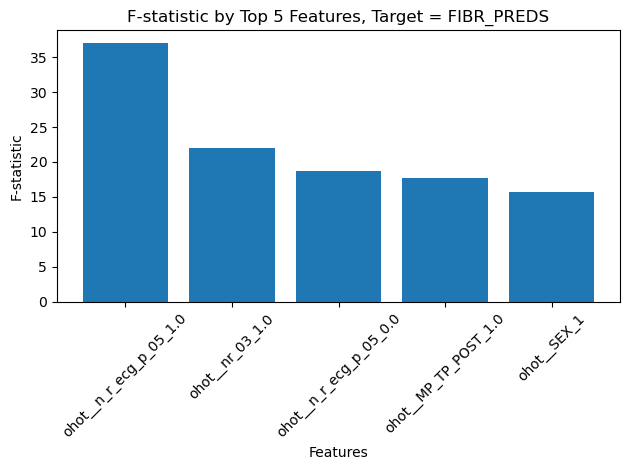

54.109154318846315


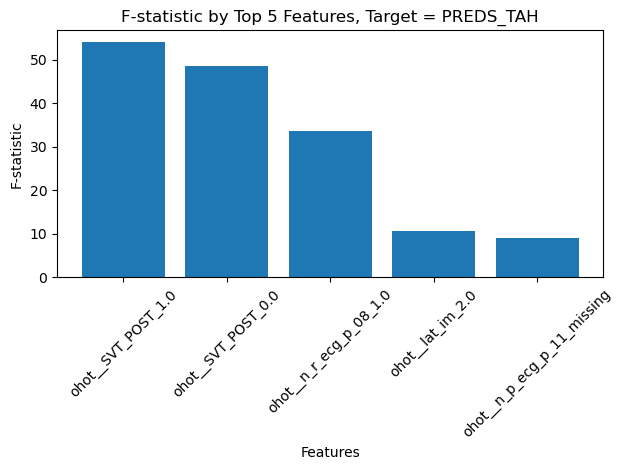

20.77334721499219


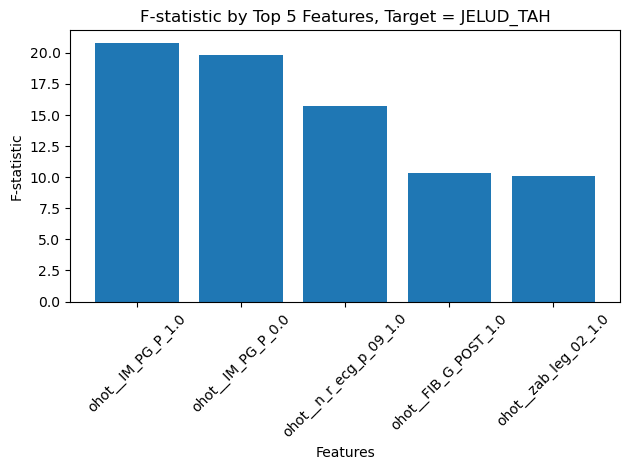

56.68126697919574


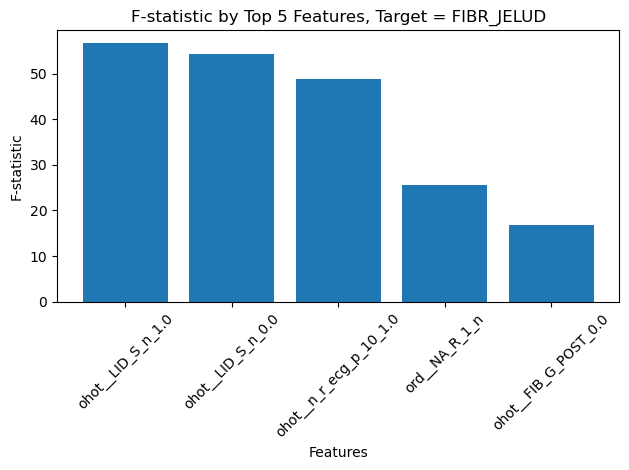

55.81892871479518


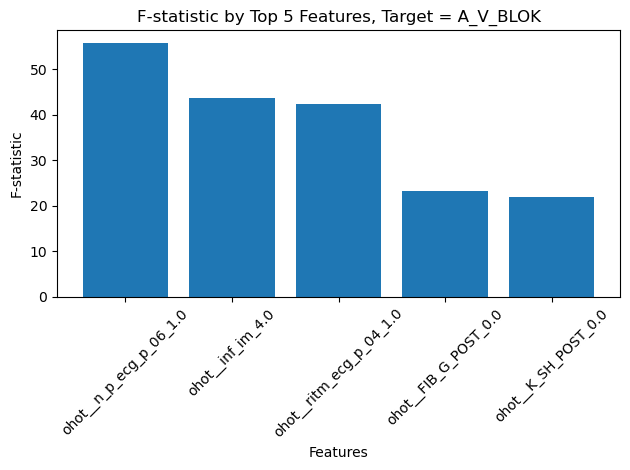

117.24320796091682


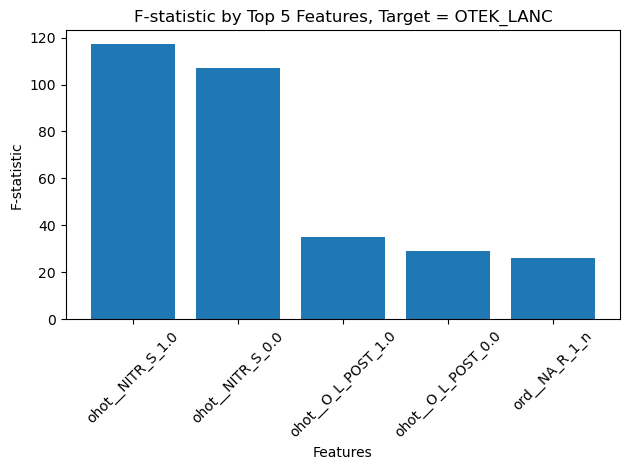

34.94585907596147


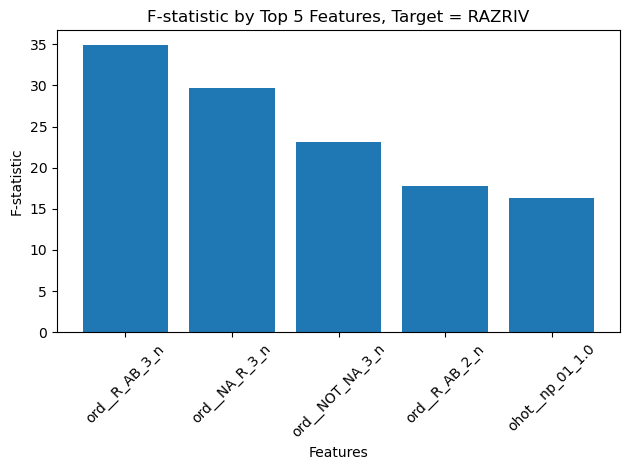

15.185873522124869


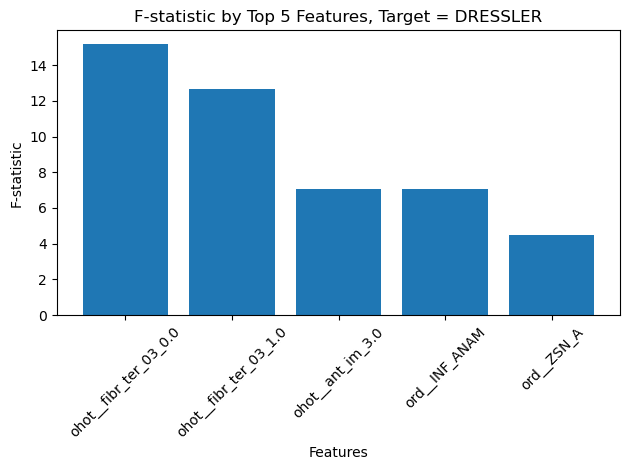

24.79847639294888


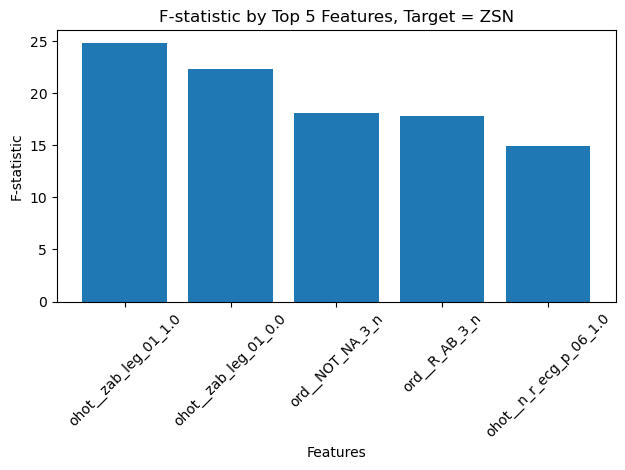

18.529253317488614


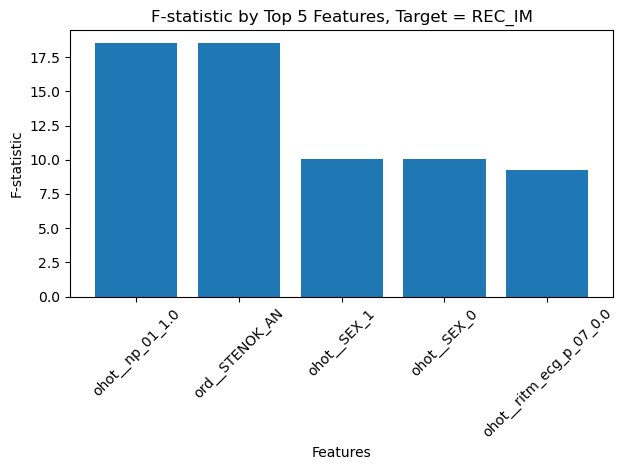

11.88162237412378


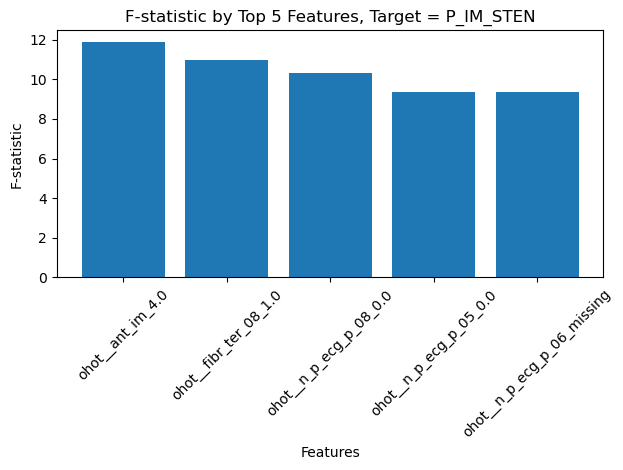

143.42742484980306


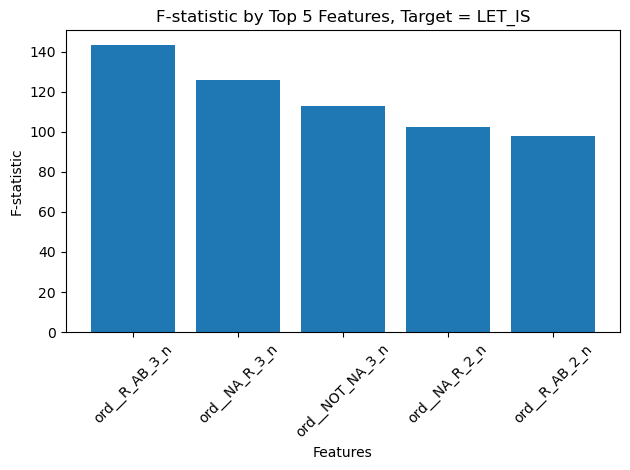

In [147]:
from sklearn.feature_selection import f_classif, mutual_info_classif

X_oh_ord = X_train_df[np.concatenate([ohot_columns,ord_columns])] #only onehot and ordinal ftrs because no nans

#linear correlations
for target in target_names:
    f_stats, p_values = f_classif(X_oh_ord, y_train[target])
    lin_corr = pd.Series(f_stats, index = X_oh_ord.columns).sort_values(ascending=False)

    Xf = lin_corr.head(5).index
    Yf = lin_corr.head(5).values
    print(max(Yf))

    
    plt.bar(Xf, Yf)
    figsize = (4,3)
    plt.title(f'F-statistic by Top 5 Features, Target = {target}')
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('F-statistic')
    plt.tight_layout()
    plt.show()

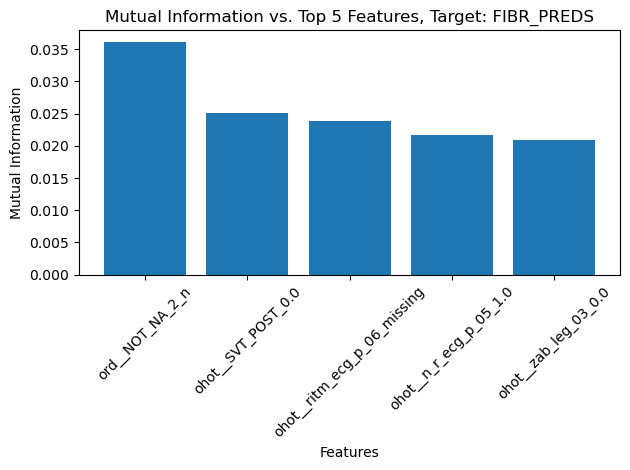

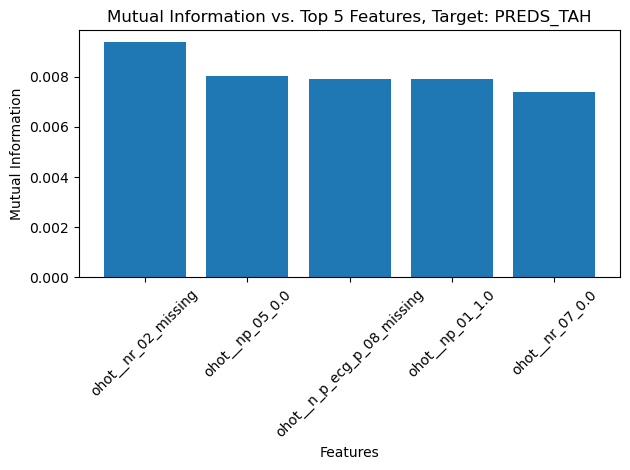

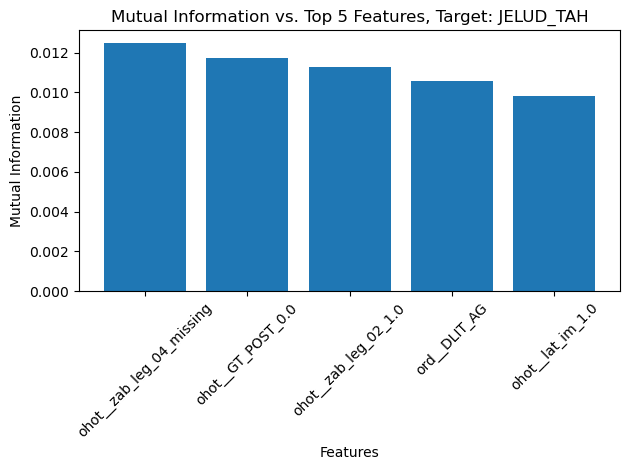

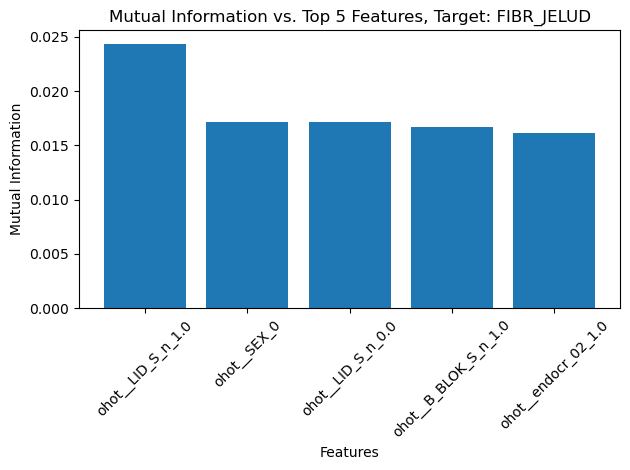

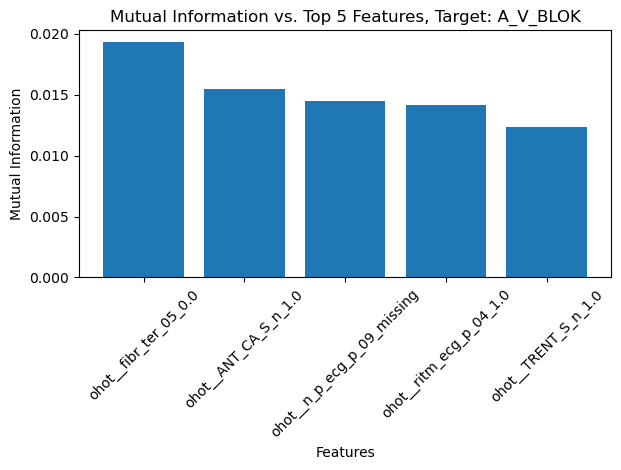

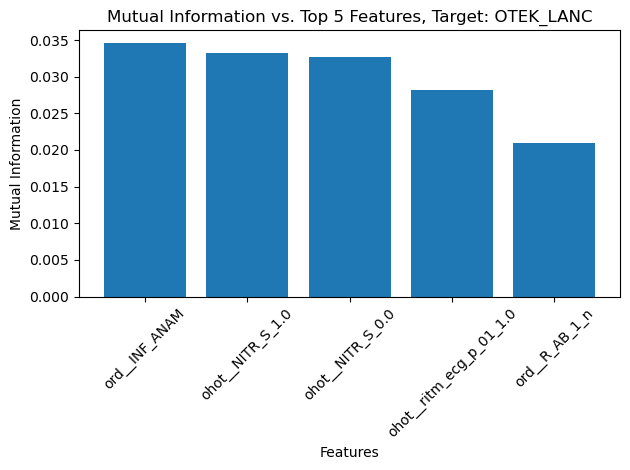

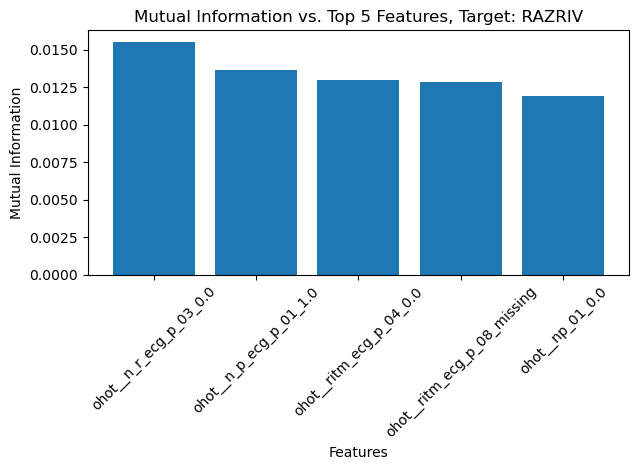

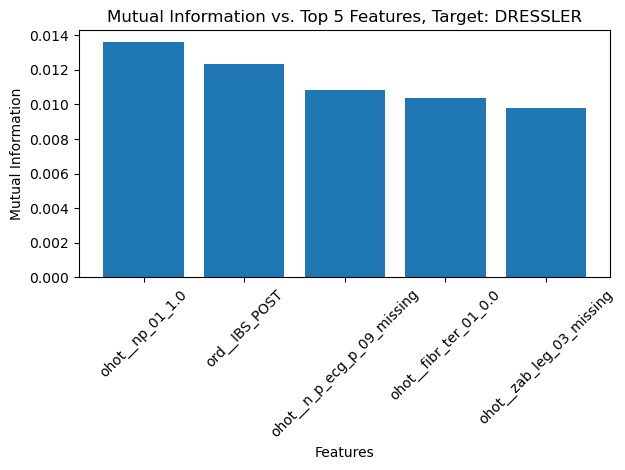

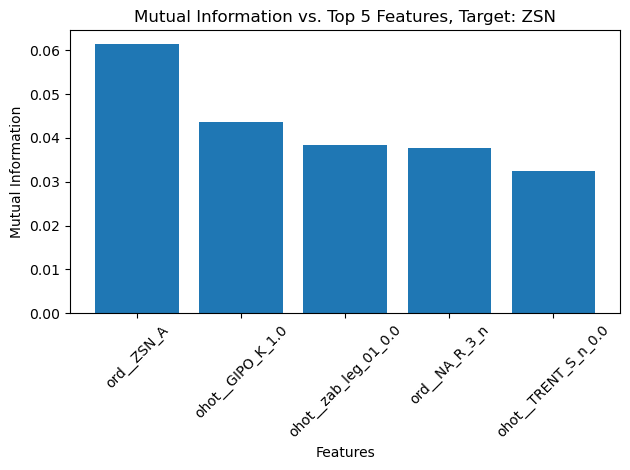

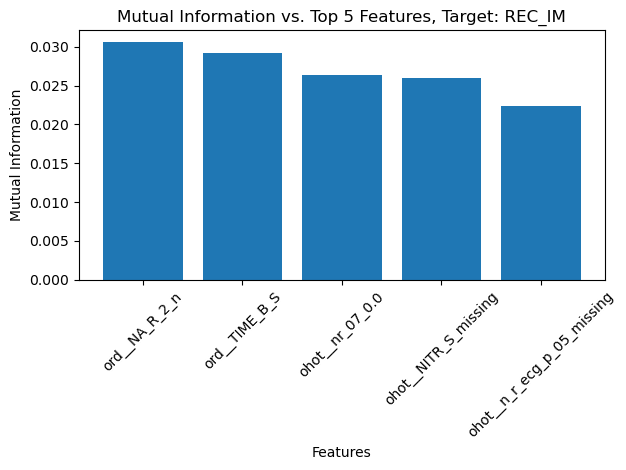

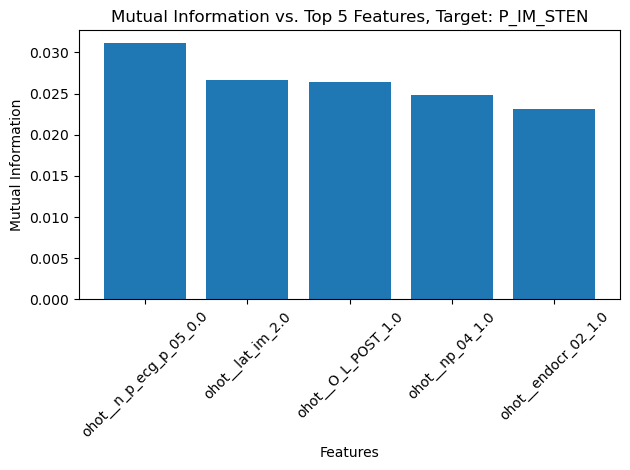

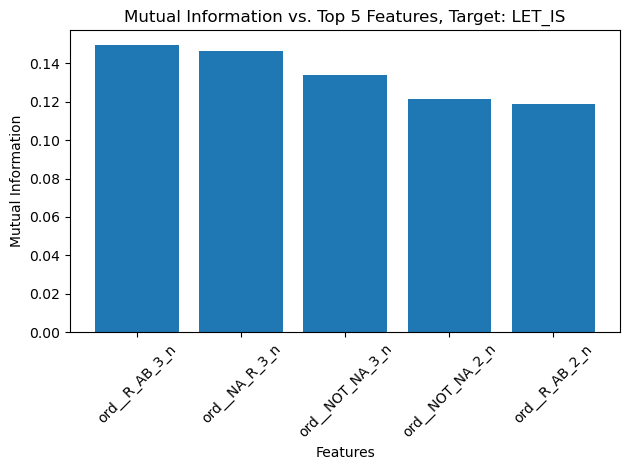

In [159]:

#non-linear correlations
for target in target_names:
    mc = mutual_info_classif(X_oh_ord, y_train[target])
    non_lin_corr = pd.Series(mc, X_oh_ord.columns).sort_values(ascending=False)

    Xm = non_lin_corr.head(5).index
    Ym = non_lin_corr.head(5).values

    
    plt.bar(Xm, Ym)
    figsize=(4,3)
    plt.title(f'Mutual Information vs. Top 5 Features, Target: {target}')
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Mutual Information')
    plt.tight_layout()
    plt.show()